<a href="https://colab.research.google.com/github/Raynould-Joseph/Machine-Learning-/blob/main/Kmeans_algorithum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/sample_data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


scattterplot the data


Text(0, 0.5, 'Income($)')

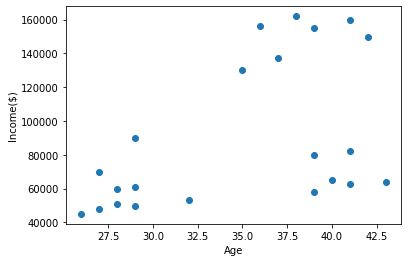

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

k is 3

In [6]:
km =KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [12]:
df['cluster']=y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


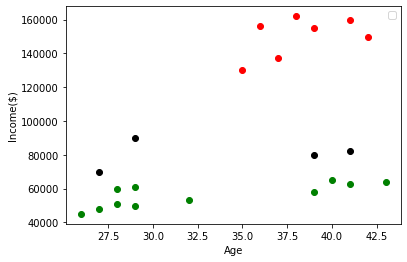

In [15]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


# scaling is not right

In [21]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [24]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


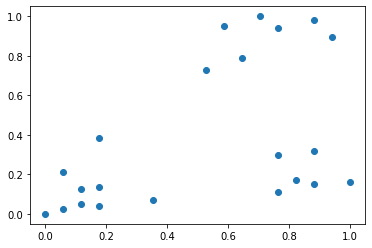

In [25]:
plt.scatter(df.Age,df['Income($)'])

# doing kmeans after this scaling

In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [27]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [28]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

# cluster centrer is pointed 

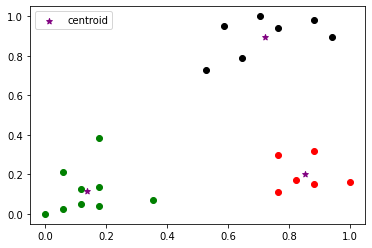

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# elbow plot

In [30]:
sse = []
#range
k_rng = range(1,10)
# going to 1 to0 9
for k in k_rng:
    km = KMeans(n_clusters=k)
    #used the name coloumn
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

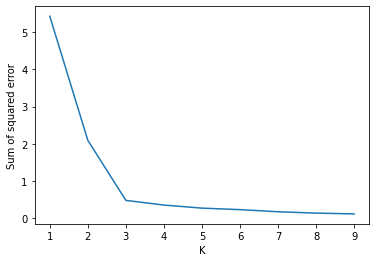

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [32]:
df=pd.read_csv('/content/sample_data/Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


Text(0, 0.5, 'Store_Sales')

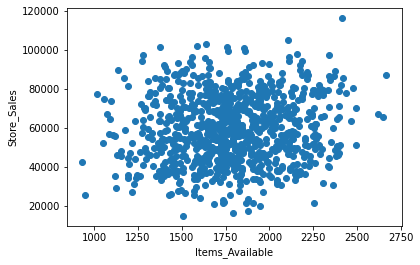

In [33]:
plt.scatter(df.Items_Available,df.Store_Sales)
plt.xlabel('Items_Available')
plt.ylabel('Store_Sales')

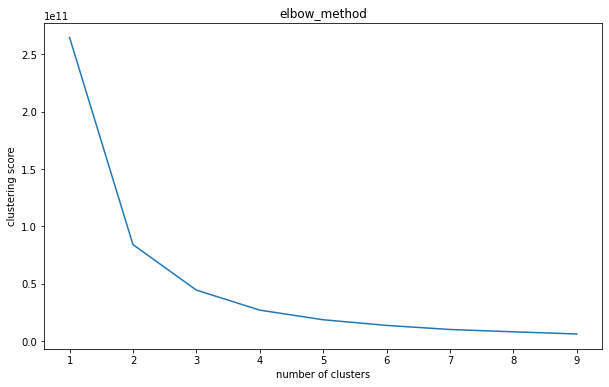

In [38]:
individual_clustering_score=[]
for i in range(1,10):
  Kmeans=KMeans(n_clusters=i,init='random',random_state=42)
  Kmeans.fit(df)
  individual_clustering_score.append(Kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),individual_clustering_score)
plt.title('elbow_method')
plt.xlabel('number of clusters')
plt.ylabel('clustering score')
plt.show()




In [39]:
individual_clustering_score

[264751342777.70404,
 84135599855.92838,
 44492772950.34747,
 27013188387.48059,
 18621459505.287643,
 13703453172.326948,
 10135951634.446198,
 8113725163.589197,
 6226196513.832696]

In [40]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Items_Available','Store_Sales']])
y_predicted

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [41]:
df['cluster']=y_predicted
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,cluster
0,1,1659,1961,530,66490,0
1,2,1461,1752,210,39820,1
2,3,1340,1609,720,54010,1
3,4,1451,1748,620,53730,1
4,5,1770,2111,450,46620,1


In [42]:
km.cluster_centers_

array([[ 1813.51715686, 74878.65196078],
       [ 1755.71516393, 46369.42622951]])

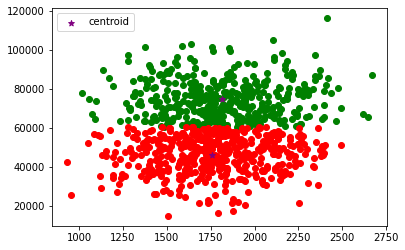

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.Items_Available,df1['Store_Sales'],color='green')
plt.scatter(df2.Items_Available,df2['Store_Sales'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()